<a href="https://colab.research.google.com/github/datilasilva/MyDataProject/blob/main/MyDataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task**


*   Select one or several services
*   Contact them to get your data (asap!)
*   Do an analysis on the data
*   Create a visualization / presentation
*   Prepare a 3-minute presentation – no more, no less


**DETAIL**

MyData from: Google Takeout - Your account, your data.


In [ ]:
#IMPORT LIBRARY
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
from datetime import datetime, timezone
from collections import Counter
import json
from pandas import json_normalize
import csv

In [ ]:
#IMPORT DATA
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#IMPORT DATA PLAYLIST YOUTUBE
catolic_music ='/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files)/Takeout/YouTube and YouTube Music/playlists/Católica.csv'
mild_suffering_love = '/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files)/Takeout/YouTube and YouTube Music/playlists/Choro sem torresmo.csv'
high_suffering_love = '/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files)/Takeout/YouTube and YouTube Music/playlists/Choro com torresmo.csv'
strong_girl = '/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files)/Takeout/YouTube and YouTube Music/playlists/Menina, tu é foda!.csv'
#IMPORT DATA SUBSCRIPTION
subscription_youtube = '/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files)/Takeout/YouTube and YouTube Music/subscriptions/subscriptions.csv'


In [ ]:
#How many channels do I follow?
subscription_youtube = pd.read_csv(subscription_youtube)
subscription_youtube.shape

(242, 3)

In [ ]:
#READ DATA high_suffering_love
high_suffering = pd.read_csv(high_suffering_love)

In [ ]:
#CLEAN values NaN
high_suffering_columns = high_suffering.drop(columns=["Time Created", "Time Updated", "Description", "Visibility", "Title"])
high_suffering_love = high_suffering_columns.drop([0,1])

In [ ]:
#SEPARATE day, month and hours

high_suffering_love['Year'] = high_suffering_love['Channel ID'].str[:4]
high_suffering_love['Date'] = high_suffering_love['Channel ID'].str[:10]
high_suffering_love['Hour'] = high_suffering_love['Channel ID'].str[11:13]
high_suffering_love['Time'] = high_suffering_love['Channel ID'].str[11:19]
high_suffering_love['Month'] = high_suffering_love['Channel ID'].str[5:7]

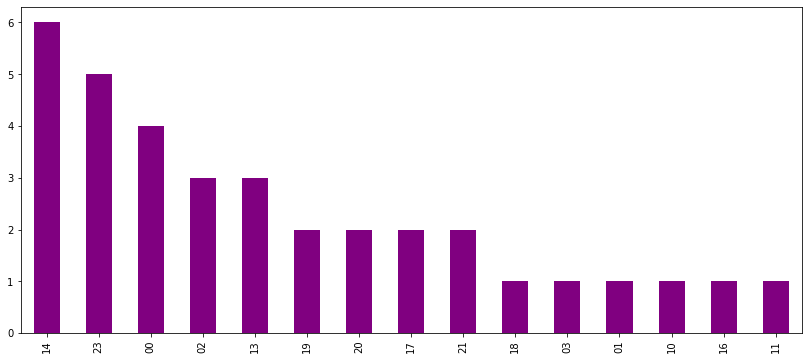

In [ ]:
# QUESTION: What time I look for music to cry (love)? - FREQUENCY TIME
high_suffering_love['Hour'].value_counts().plot(kind='bar', color="purple", figsize=(14,6))

**CONCLUSION**

Strangely, I searched for more songs about suffering in love (high) 14h, 23 and 00.


23 and 00 its okay, but 14h??? What???
________________________________________________________________________________

In [ ]:
#READ DATA mild_suffering_love
mild_suffering= pd.read_csv(mild_suffering_love)

In [ ]:
#CLEAN values NaN
mild_suffering_columns = mild_suffering.drop(columns=["Time Created", "Time Updated", "Description", "Visibility"])
mild_suffering_love = mild_suffering_columns.drop([0,1])

In [ ]:
#SEPARATE day, month and hours

mild_suffering_love['Year'] = mild_suffering_love['Channel ID'].str[:4]
mild_suffering_love['Date'] = mild_suffering_love['Channel ID'].str[:10]
mild_suffering_love['Hour'] = mild_suffering_love['Channel ID'].str[11:13]
mild_suffering_love['Time'] = mild_suffering_love['Channel ID'].str[11:19]
mild_suffering_love['Month'] = mild_suffering_love['Channel ID'].str[5:7]

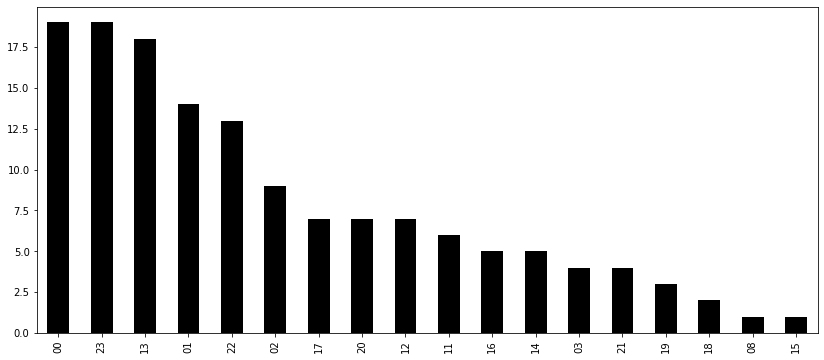

In [ ]:
# QUESTION: What time I look for music to cry (love)? - FREQUENCY TIME
mild_suffering_love['Hour'].value_counts().plot(kind='bar', color="black", figsize=(14,6))

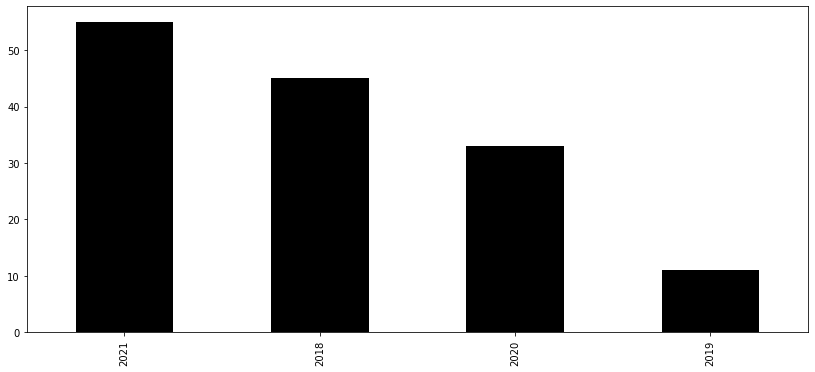

In [ ]:
# QUESTION: What time I look for music to cry (love)? - FREQUENCY TIME
mild_suffering_love['Year'].value_counts().plot(kind='bar', color="black", figsize=(14,6))

**CONCLUSION**

I searched for more songs about suffering in love (high) 13h, 23 and 00.

In my lunch break and before sleep
________________________________________________________________________________

In [ ]:
#READ DATA strong_girl_playlist
strong_girl= pd.read_csv(strong_girl)

In [ ]:
#CLEAN values NaN
strong_girl_columns = strong_girl.drop(columns=["Time Created", "Time Updated", "Description", "Visibility"])
strong_girl_playlist = strong_girl_columns.drop([0,1])

In [ ]:
#SEPARATE day, month and hours

strong_girl_playlist['Year'] = strong_girl_playlist['Channel ID'].str[:4]
strong_girl_playlist['Month'] = strong_girl_playlist['Channel ID'].str[5:7]
#strong_girl_playlist['day'] = strong_girl_playlist['Channel ID'].str[8:10]
strong_girl_playlist['Date'] = strong_girl_playlist['Channel ID'].str[:10]
strong_girl_playlist['Hour'] = strong_girl_playlist['Channel ID'].str[11:13]
#strong_girl_playlist['minute'] = strong_girl_playlist['Channel ID'].str[14:16]
#strong_girl_playlist['second'] = strong_girl_playlist['Channel ID'].str[17:19]
strong_girl_playlist['Time'] = strong_girl_playlist['Channel ID'].str[11:19]

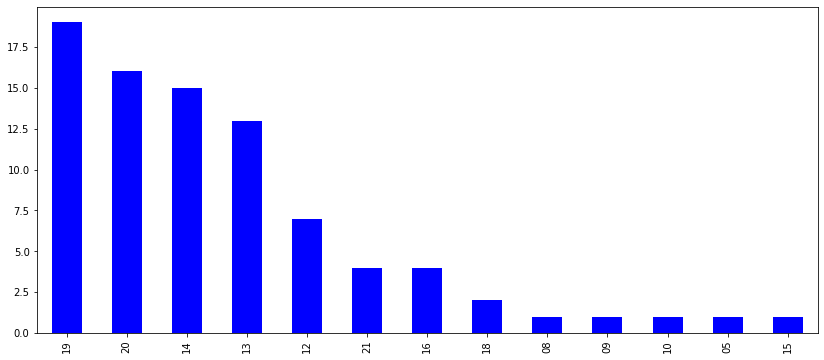

In [ ]:
# QUESTION: What time I look for music to feel like a strong woman? - FREQUENCY TIME
strong_girl_playlist['Hour'].value_counts().plot(kind='bar', color="blue", figsize=(14,6))

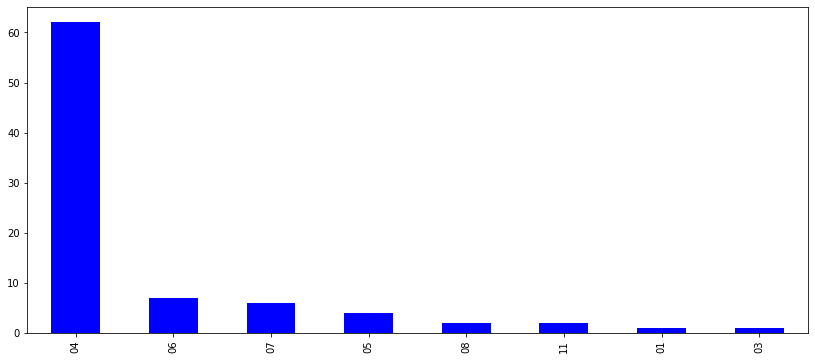

In [ ]:
# QUESTION: What time I look for music to feel like a strong woman? - FREQUENCY TIME
strong_girl_playlist['Month'].value_counts().plot(kind='bar', color="blue", figsize=(14,6))

In [ ]:
#Counter is the frequency
strong_girl_year = strong_girl_playlist['Year']
strong_girl_year_freq = Counter(strong_girl_year)
strong_girl_year_freq

Counter({'2021': 83, '2022': 2})

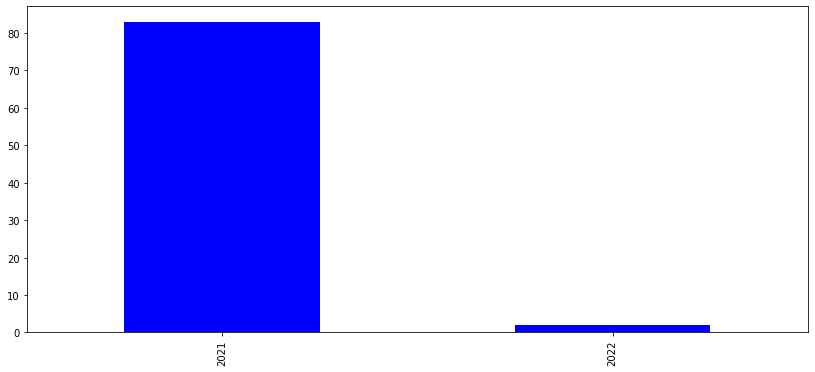

In [ ]:
# QUESTION: When I look for music to feel like a strong woman? - FREQUENCY YEAR
strong_girl_playlist['Year'].value_counts().plot(kind='bar', color="blue", figsize=(14,6))

**CONCLUSION**

I usually have a break between activities in Brazil and Sweden between 6pm - 8pm, it's probably a time when I look for songs to channel my energy and not give up.
________________________________________________________________________________

In [ ]:
#READ DATA strong_girl_playlist
catolic_music = pd.read_csv(catolic_music)

In [ ]:
#CLEAN values NaN
catolic_music_columns = catolic_music.drop(columns=["Time Created", "Time Updated", "Description", "Visibility"])
catolic_music = catolic_music_columns.drop([0,1])

In [ ]:
#SEPARATE day, month and hours

catolic_music['Year'] = catolic_music['Channel ID'].str[:4]
catolic_music['Date'] = catolic_music['Channel ID'].str[:10]
catolic_music['Hour'] = catolic_music['Channel ID'].str[11:13]
catolic_music['Time'] = catolic_music['Channel ID'].str[11:19]
catolic_music['Month'] = catolic_music['Channel ID'].str[5:7]

In [ ]:
#Match
catolic_music.loc[(catolic_music['Year'] == '2017') & (catolic_music['Month'] == '07')].shape[0]

38

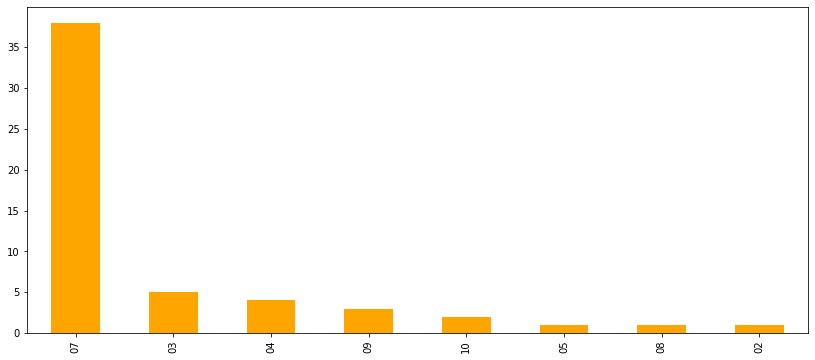

In [ ]:
catolic_music['Month'].value_counts().plot(kind='bar', color="orange", figsize=(14,6))

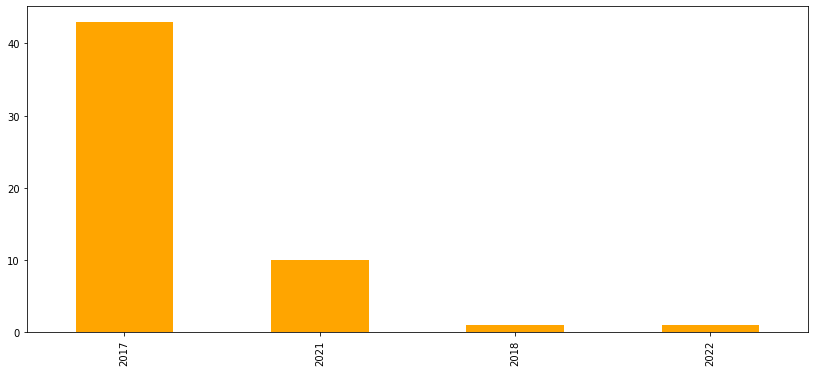

In [ ]:
# QUESTION: When I look for music about Good? - FREQUENCY TIME
catolic_music['Year'].value_counts().plot(kind='bar', color="orange", figsize=(14,6))

**CONCLUSION**

I looked for songs about God more often in 2017 and 2021. In those 2 moments I know there were challenges in my life.
________________________________________________________________________________

In [ ]:
#open json file
june_2016 = '/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_JUNE.json'
june_2016_read = pd.read_json(june_2016)
#acess path
#print(june_2016_read['timelineObjects'][0]['placeVisit']['location']['name'])
#create empty and input online name and address
name_list = []
for t in june_2016_read['timelineObjects']:
  if 'placeVisit' in t:
     name_list.append(
        {
            'name': t['placeVisit']['location']['name'],
            'address': t['placeVisit']['location']['address']
        }
    )
#create DataFrame
df = pd.DataFrame(name_list)
df

,name,address
0,Hamburgão e Mexidão do Mayck,"Avenida Vereador Hamilton Teodoro Guimarães, 1..."
1,Praça Euzébio Cabral,"Praça Euzébio Cabral - Esplanada, Governador V..."
2,Receita Federal - Delegacia de Receita Federal...,"Avenida Brasil, 2866 - Centro, Governador Vala..."
3,ARDOCE,"Rua 14, 158 - Ilha dos Araújos, Governador Val..."
4,Fórum da Comarca de Governador Valadares,"Praça do XX Aniversário, s/n - Centro, Governa..."
...,...,...
87,Big Mais,"Avenida Carlos Gomes, 209 - Altinópolis, Gover..."
88,Moto Taxi Expresso Ferrovia,"Avenida Vereador Hamilton Teodoro Guimarães, 9..."
89,Receita Federal - Delegacia de Receita Federal...,"Avenida Brasil, 2866 - Centro, Governador Vala..."
90,Praça Getúlio Vargas,"Rua Alagoas, S/N - Lourdes, Governador Valadar..."


In [ ]:
#The glob module is a useful part of the Python standard library. glob (short for global) is used to return all file paths that match a specific pattern.
import glob
import pathlib
files = glob.glob('/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/*.json')

In [ ]:
files

['/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_JUNE.json',
 '/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_OCTOBER.json',
 '/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_SEPTEMBER.json',
 '/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_JULY.json',
 '/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_DECEMBER.json',
 '/content/drive/MyDrive/Assessement Hyper 2/Cop

In [ ]:
json_df = pd.read_json(files[0])

In [ ]:
name = []
address = []

for fil in files:
    json_df = pd.read_json(fil)
    for t_obj in json_df['timelineObjects']:
      if 'placeVisit' in t_obj:
        name.append(t_obj['placeVisit']['location'].get('name'))
        address.append(t_obj['placeVisit']['location'].get('address'))

concat_df = pd.DataFrame({
    'name':name,
    'address':address
})
concat_df

ValueError: ignored

In [ ]:
concat_df.loc[(concat_df['name'] == 'R. dos Ipês, 72')].shape

In [ ]:
concat_df.loc[(concat_df['name'] == 'Fórum da Comarca de Governador Valadares')].shape

In [ ]:
concat_df.loc[(concat_df['name'] == 'Rua João Pinheiro, 345 - Esplanada, Governador Valadares')].shape

In [ ]:
files[4]

In [ ]:
files[5]

In [ ]:
help(files)

In [ ]:
files.pop(4)
files

In [ ]:
import plotly.express as px
import pandas as pd
import json

In [ ]:


json_df = pd.read_json(files[])
for t_obj in json_df['timelineObjects']:
  if 'placeVisit' in t_obj:
    name.append(t_obj['placeVisit']['location'].get('name'))
    address.append(t_obj['placeVisit']['location'].get('address'))

In [ ]:
name = []
address = []

for fil in files:
  json_df = pd.read_json(fil)
  print(json_df)

  for t_object in json_df['timelineObjects']:
      if 'placeVisit' in t_object:
          #name.append(t_object['placeVisit']['location']['name'])
          address.append(t_object['placeVisit']['location']['address'])

concat_df = pd.DataFrame({
    #'name': name,
    'address': address
})

concat_df

In [ ]:
import os
# create empty list to store dataframes
li = []
# loop through list of files and read each one into a dataframe and append to list
for f in files:
  # get filename
    stock = os.path.basename(f)
    # read in csv
    temp_df = pd.read_json(f)
    # create new column with filename
    temp_df['ticker'] = stock
    # data cleaning to remove the .csv
    temp_df['ticker'] = temp_df['ticker'].replace('.json', '', regex=True)
    # append df to list
    if 'placeVisit' in t:
      li.append(
        {
            'name': t['placeVisit']['location']['name'],
            'address': t['placeVisit']['location']['address']
        }
    )
      #create DataFrame
      df_total = pd.concat(li, axis=0)
      df = pd.DataFrame(li)
      df 
    
    li.append(temp_df)
    print(f'Successfully created dataframe for {f} with shape {temp_df.shape}')
    # concatenate our list of dataframes into one!
df_total = pd.concat(li, axis=0)
print(df_total.shape)

In [ ]:
import os
# create empty list to store dataframes
li = []
# loop through list of files and read each one into a dataframe and append to list
for f in files:
  # get filename
    stock = os.path.basename(f)
    # read in csv
    temp_df = pd.read_json(f)
    # create new column with filename
    temp_df['ticker'] = stock
    # data cleaning to remove the .csv
    temp_df['ticker'] = temp_df['ticker'].replace('.json', '', regex=True)
    # append df to list
    li.append(temp_df)
    print(f'Successfully created dataframe for {f} with shape {temp_df.shape}')
    # concatenate our list of dataframes into one!
df_total = pd.concat(li, axis=0)
print(df_total.shape)

In [ ]:
# create empty list to store dataframes
li = []
# loop through list of files and read each one into a dataframe and append to list
for f in files:
  # get filename
    stock = os.path.basename(f)
    # read in csv
    temp_df = pd.read_json(f)
    # create new column with filename
    temp_df['ticker'] = stock
    # data cleaning to remove the .json
    temp_df['ticker'] = temp_df['ticker'].replace('.json', '', regex=True)
    # append df to list
    li.append(temp_df)
    print(f'Successfully created dataframe for {stock} with shape {temp_df.shape}')
    # concatenate our list of dataframes into one!
df_total = pd.concat(li, axis=0)
print(df_total.shape)

In [ ]:
pd.DataFrame(li)


In [ ]:
#acess path
#print(june_2016_read['timelineObjects'][0]['placeVisit']['location']['name'])
#create empty and input online name and address
#name_list = []
#for t in june_2016_read['timelineObjects']:
if 'placeVisit' in f:
  li.append(
  {
    'name': f['placeVisit']['location']['name'],
    'address': f['placeVisit']['location']['address']
  }
  )
#create DataFrame
df_2 = pd.DataFrame(li)
print(df_2)

In [ ]:
import glob
files = glob.glob('/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/*.json')
for l in files:
  print(l)

In [ ]:

with open('/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_JULY.json') as json_file: 
    data = json.load(json_file) 
  
employee_data = data['timelineObjects'] 
data_file = open('data_file.csv', 'w') 
csv_writer = csv.writer(data_file) 
count = 0
  
for emp in employee_data: 
    if count == 0: 
        header = emp.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    
    csv_writer.writerow(emp.values()) 
  
data_file.close() 

In [ ]:
y = pd.read_csv('data_file.csv')

In [ ]:
file_name = "/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_AUGUST.json"


In [ ]:
url = "/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_AUGUST.json"

In [ ]:
with open('/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_JULY.json') as f:
   data = json.load(f)

print(data)

In [ ]:
df = json_normalize(data) #Results contain the required data
print(df)

In [ ]:
#CREATE cvs  file
df = pd.read_json (r'/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_OCTOBER.json')
vv = df.to_csv (r'/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_OCTOBER.csv', index = None)

In [ ]:
pd.read_csv('/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_OCTOBER.csv')

In [ ]:
bb = pd.read_csv('/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_OCTOBER.csv')

In [ ]:
bb.head()

In [ ]:
with open('/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_JULY.json') as json_file: 
    data = json.load(json_file) 
  
employee_data = data['timelineObjects'] 
data_file = open('data_file.csv', 'w') 
csv_writer = csv.writer(data_file) 
count = 0
  
for emp in employee_data: 
    if count == 0: 
        header = emp.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    
    csv_writer.writerow(emp.values()) 
  
data_file.close() 

In [ ]:
data = json.load(open('/content/drive/MyDrive/Assessement Hyper 2/Copy of Takeout/takeout-20220331T064458Z-001.zip (Unzipped Files) (1)/Takeout/Location History/Semantic Location History/2016/2016_SEPTEMBER.json'))
jtopy=json.dumps(data) #json.dumps take a dictionary as input and returns a string as output.
dict_json=json.loads(jtopy) # json.loads take a string as input and returns a dictionary as output.
print(dict_json["timelineObjects"])